Creates statistics based on the encoding duration of tested encoders. The last line of code can be used to export the graph to a PNG. For each of the 2 encoders a set of 1000 photos (800 x 600 pixel) got encoder and the duration was measured for each of them. This process was repeated 100 times. The input files consists of 100 lines, each containing 1000 durations in milli seconds separated by a semicolon.

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import requests

def downloadResults(filename):
  response = requests.get('https://raw.githubusercontent.com/tederer/octowatch-evaluation/main/measurements/jpegEncoding/' + filename)
  with open(filename, 'wb') as fd:
    for chunk in response.iter_content(chunk_size=1024):
      fd.write(chunk)

In [6]:
downloadResults('hardware.csv')
downloadResults('libjpeg9.csv')
downloadResults('libjpeg62-turbo.csv')

In [7]:
def readCsvFile(filename):
  csvFile = open(filename, 'r')
  lines = csvFile.readlines()

  values = []
  index  = 0

  for line in lines:
    for value in line.split(';'):
      values.append(float(value))

  return values

libjpeg9     (median = 66.132, average = 66.982)
libjpegTurbo (median = 19.099, average = 19.857)
hardware     (median = 2.919, average = 2.984)


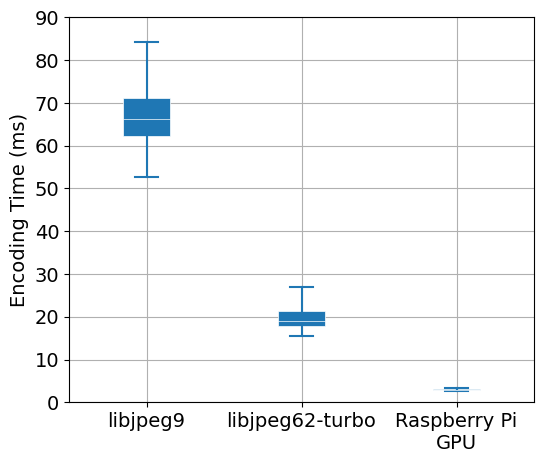

In [8]:
hardwareValues     = readCsvFile('hardware.csv')
libjpeg9Values     = readCsvFile('libjpeg9.csv')
libjpegTurboValues = readCsvFile('libjpeg62-turbo.csv')
values = [libjpeg9Values, libjpegTurboValues, hardwareValues]

print('libjpeg9     (median = {median:.3f}, average = {avg:.3f})'.format(median=np.median(libjpeg9Values), avg=np.average(libjpeg9Values)))
print('libjpegTurbo (median = {median:.3f}, average = {avg:.3f})'.format(median=np.median(libjpegTurboValues), avg=np.average(libjpegTurboValues)))
print('hardware     (median = {median:.3f}, average = {avg:.3f})'.format(median=np.median(hardwareValues), avg=np.average(hardwareValues)))

figure, axes = plt.subplots(figsize=[6, 5])
plt.rcParams.update({'font.size': 14})

axes.set_ylabel('Encoding Time (ms)', fontsize=14)
axes.grid(True)
axes.set_ymargin(0)
axes.set_ylim(bottom=0, top=90)
axes.boxplot(values,
             labels  = ["libjpeg9", "libjpeg62-turbo", "Raspberry Pi\nGPU"],
             patch_artist = True,
             showfliers   = False,
             medianprops  = {"color": "white", "linewidth": 0.5},
             boxprops     = {"facecolor": "C0", "edgecolor": "white", "linewidth": 0.5},
             whiskerprops = {"color": "C0", "linewidth": 1.5},
             capprops     = {"color": "C0", "linewidth": 1.5},
             flierprops   = {"marker": 'o', "markerfacecolor": "gray", "markersize": 3, "markeredgecolor": "none"})

figure.savefig('jpegEncodingPerformance_300dpi.png', bbox_inches='tight', pad_inches=0.05, dpi=300)
figure.savefig('jpegEncodingPerformance_1000dpi.png', bbox_inches='tight', pad_inches=0.05, dpi=1000)
